<a href="https://colab.research.google.com/github/meghamouni123/shreecodesoft/blob/main/c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1818188%2F2965537%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240518%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240518T090417Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0b206d2b0372ff039907dcb0937ea3fbe63dbdf0b2ec021672607b82819329acec50bf38270ba6b6a0febf40b953712ee9cd9f4b0dcc77f3a5908b396b745e30350c1123244c1b00bca8bfa284d87d6616d3ff73c8459ecbb6c4a14b0c5ccae426340fe9ce709e6cf2e6fc5ab52a97fa385744ca1d8bcbca4fd9b70a252cce1ee59b0ff1d3ef30beca0482e75a52a2e121827514e91686fa342dfd5e0ce0bee900b50564dbe453ee1d2c3b8d73f92c91e507c0c2c8c2c48ac35d5e24287f30b72850702f0d512a83cd5cad94489052173c0d5b23c521d915b2d8836413bf8052a3b5e2d1e77f3655a449f325f3a5575092d271bd9b8ef2f18b47f6b6e4751e5c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22564 bytes downloaded
Downloaded and uncompressed: titanic-dataset
Data source import complete.


In [ ]:
! pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

![image.png](attachment:a2f1daa2-6648-4a4a-8f59-970d584c909e.png)


![image.png](attachment:25fc9346-8ddc-4e85-9d9e-6c4501dbe0ed.png)

In [ ]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def extract_cabin_number(cabin):
    if isinstance(cabin, str):
        cabin_number = ''.join(filter(str.isdigit, cabin))
        if cabin_number:
            return int(cabin_number)
    return np.nan
df['Cabin'] = df['Cabin'].apply(extract_cabin_number)

In [ ]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,5.861768e+05
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,2.716307e+06
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.000000e+00
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,5.861768e+05
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,5.861768e+05
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,5.861768e+05
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,5.759637e+07


In [ ]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

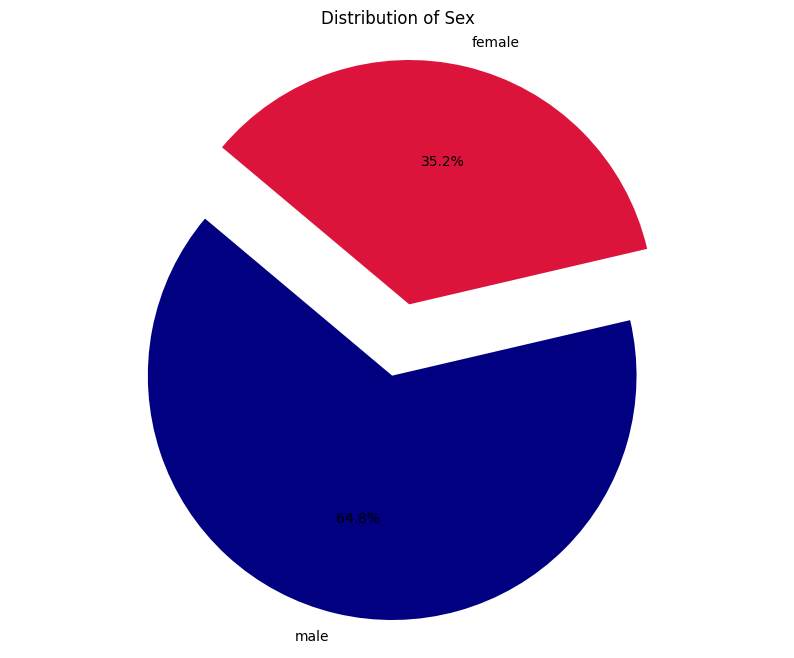

In [ ]:
sex_counts = df["Sex"].value_counts()

plt.figure(figsize=(10,8))
mycolor=["navy","crimson"]
myexplode=[0.1,0.2]
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140,colors=mycolor,explode=myexplode)
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

<ipython-input-16-f71c672224b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Sex",data=df,palette="gnuplot")


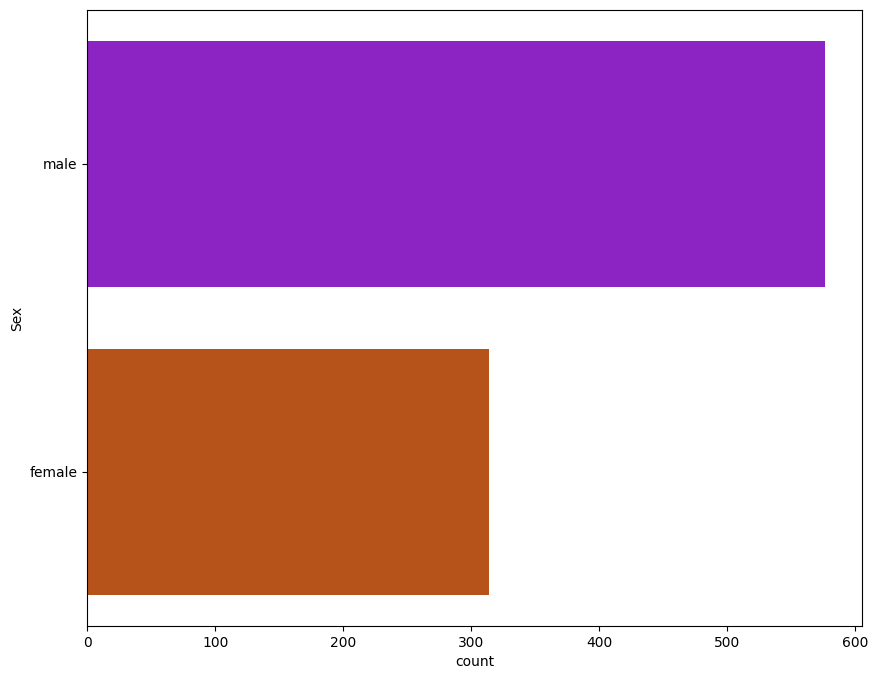

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="Sex",data=df,palette="gnuplot")
plt.show()

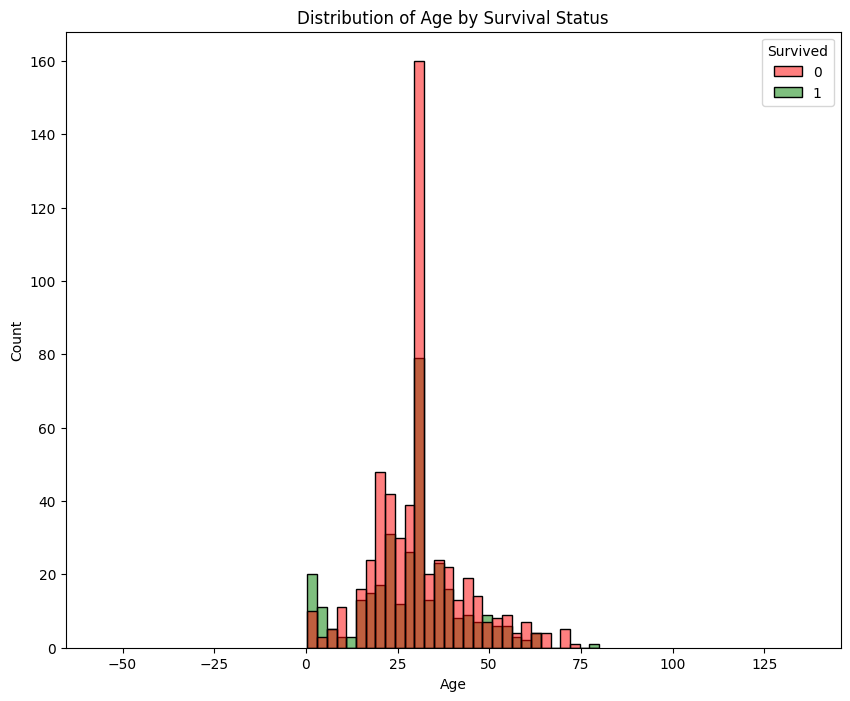

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="Age",hue="Survived",palette=["red","green"])
plt.title('Distribution of Age by Survival Status')
plt.axis("equal")
plt.show()

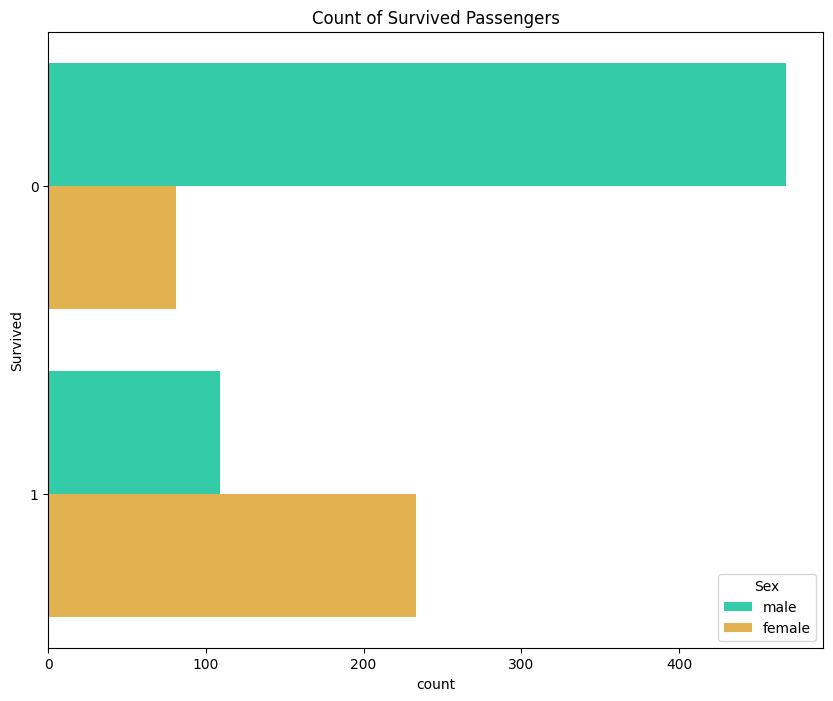

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(y="Survived", data=df, palette="turbo",hue="Sex")
plt.title('Count of Survived Passengers')
plt.show()

In [ ]:
survive_gender=df[["Survived","Sex"]].value_counts().reset_index()
survive_gender

,Survived,Sex,count
0,0,male,468
1,1,female,233
2,1,male,109
3,0,female,81


In [ ]:
em_sex=df[["Embarked","Sex"]].value_counts().reset_index()
em_sex

,Embarked,Sex,count
0,S,male,441
1,S,female,203
2,C,male,95
3,C,female,73
4,Q,male,41
5,Q,female,36


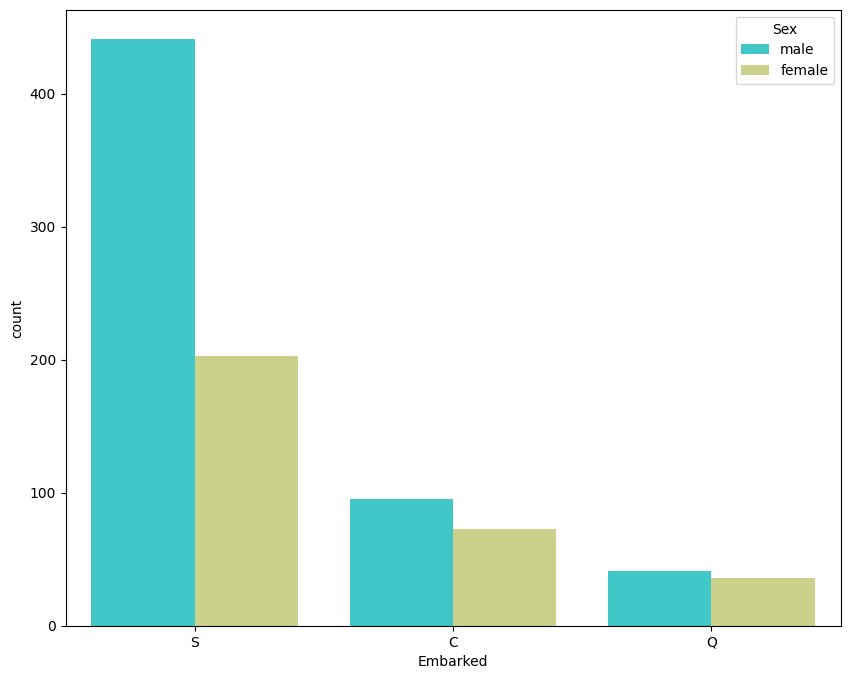

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Embarked",hue="Sex",palette="rainbow")

plt.show()

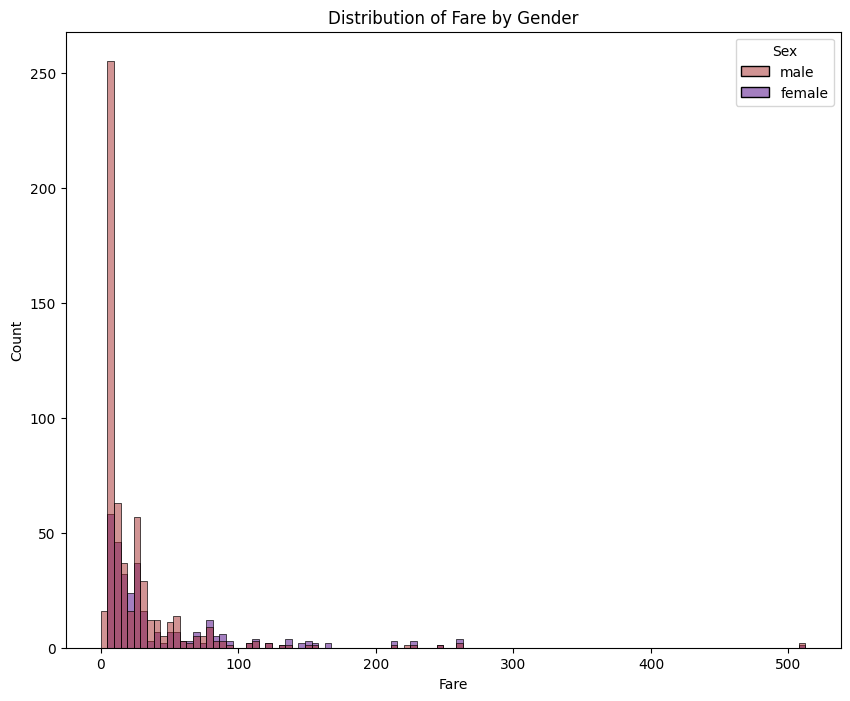

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Fare", hue="Sex", palette=["brown", "indigo"])
plt.title('Distribution of Fare by Gender')
plt.show()

In [ ]:
pc=df["Pclass"].value_counts().reset_index()
pc

,Pclass,count
0,3,491
1,1,216
2,2,184


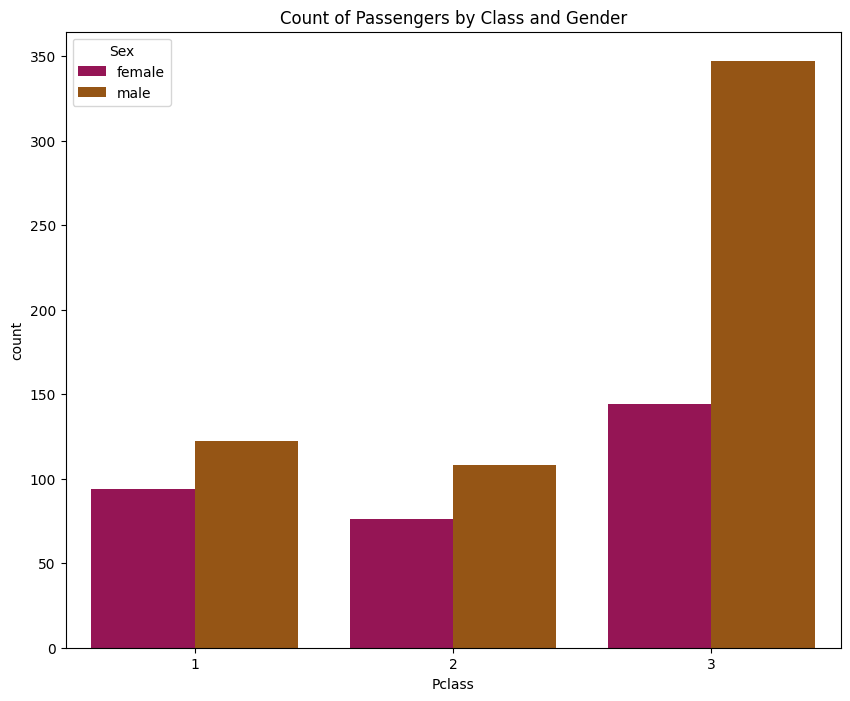

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Pclass",hue="Sex",palette="brg")
plt.title('Count of Passengers by Class and Gender')

plt.show()

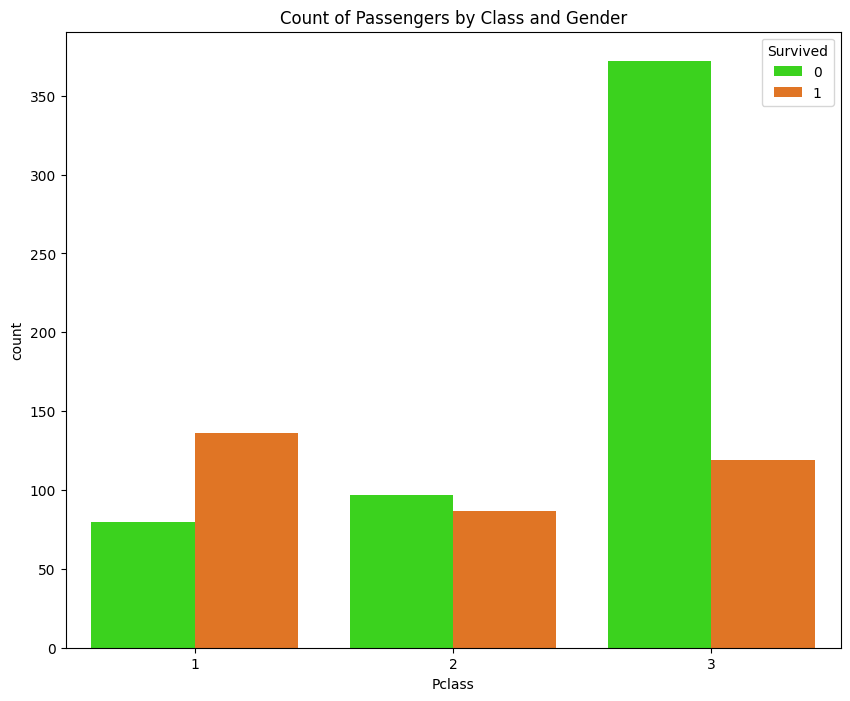

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Pclass",hue="Survived",palette="gist_ncar")
plt.title('Count of Passengers by Class and Gender')

plt.show()

In [ ]:
sib=df["SibSp"].value_counts().reset_index()
sib

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


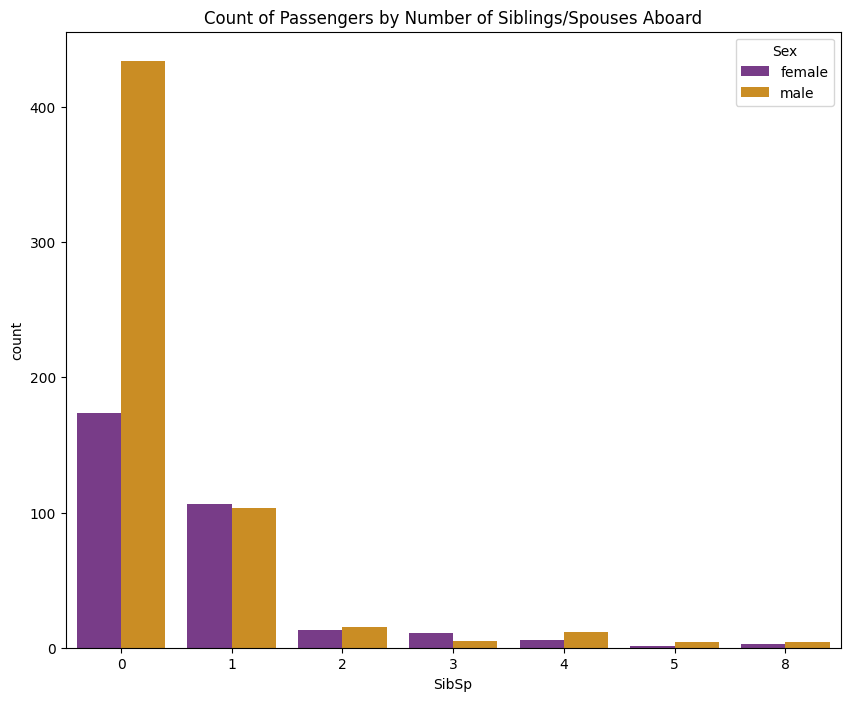

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="SibSp",hue="Sex", palette="CMRmap")
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.show()


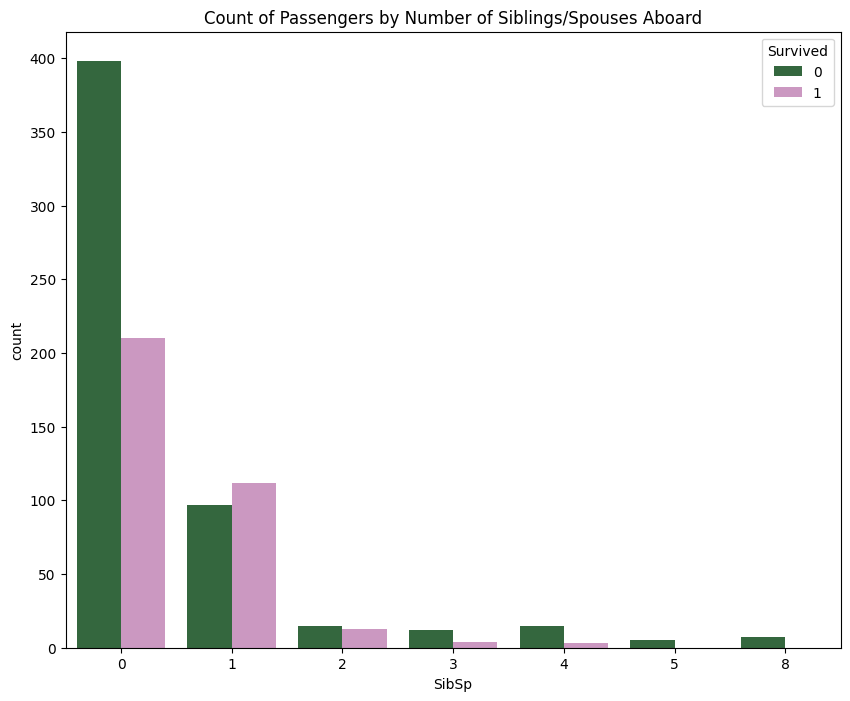

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="SibSp",hue="Survived", palette="cubehelix")
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.show()

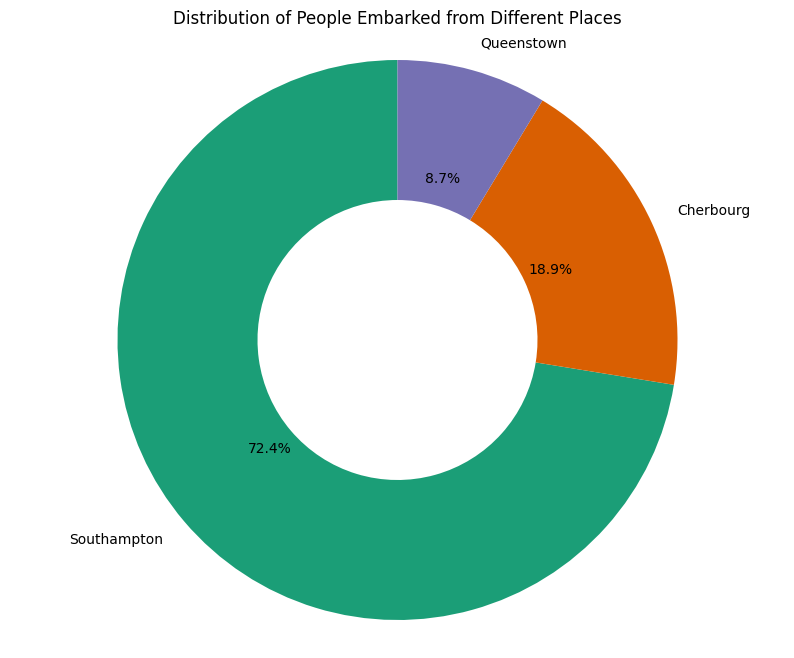

In [ ]:

embarked_counts = df['Embarked'].value_counts()

labels = ['Southampton', 'Cherbourg', 'Queenstown']
sizes = embarked_counts.values.tolist()

colors = sns.color_palette('Dark2')

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.5))
ax.axis('equal')

centre_circle = plt.Circle((0, 0), 0.40, fc='white')
ax.add_artist(centre_circle)

plt.title('Distribution of People Embarked from Different Places')
plt.show()


In [ ]:
df.drop(columns=["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [ ]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df["Sex"]=df["Sex"].replace({"male":1,"female":0})
df["Embarked"]=df["Embarked"].replace({"S":0,"C":1,"Q":2})

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())

In [ ]:
df['Embarked'] = df['Embarked'].astype(int)

In [ ]:
col=["Age","Fare","Cabin"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,4.288200e-17,0
1,1,1,0,0.638789,1,0,0.786845,-2.158890e-01,1
2,1,3,0,-0.284663,0,0,-0.488854,4.288200e-17,0
3,1,1,0,0.407926,1,0,0.420730,-2.158751e-01,0
4,0,3,1,0.407926,0,0,-0.486337,4.288200e-17,0


In [ ]:
X= df.drop(columns='Survived', axis=1)
Y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ensemble Method

* https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/#:~:text=Ensemble%20learning%20is%20a%20machine,collective%20intelligence%20of%20the%20ensemble.


* https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/


* https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

# Stacking

In [ ]:
base_models = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

In [ ]:
stack_model = StackingClassifier(estimators=base_models, final_estimator= RandomForestClassifier())
print("====================================================================================")
stack_score = cross_val_score(stack_model, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation scores for Stacking Classifier:", stack_score)
print("====================================================================================")
print("Mean accuracy of Stacking Classifier:", stack_score.mean())
print("====================================================================================")
print("Standard deviation of accuracy of Stacking Classifier:", stack_score.std())
print("====================================================================================")

Cross-Validation scores for Stacking Classifier: [0.77094972 0.78089888 0.79213483 0.81460674 0.83146067]
Mean accuracy of Stacking Classifier: 0.7980101688531793
Standard deviation of accuracy of Stacking Classifier: 0.022153854318110015


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagg_model=BaggingClassifier(estimator= RandomForestClassifier(), n_estimators=50, random_state=42)
cv_score = cross_val_score(bagg_model, X, Y, cv=5)


In [ ]:
bagg_model.fit(X_train, y_train)
y_pred=bagg_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc)

Accuracy Score : 0.8156424581005587


In [ ]:
print("Cross-Validation Scores:", cv_score)
print("===================================================================")
mean_cv_score = cv_score.mean()
std_cv_score = cv_score.std()
print("===================================================================")
print("Mean Cross-Validation Score:", mean_cv_score)
print("===================================================================")
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)
print("===================================================================")

Cross-Validation Scores: [0.80446927 0.80337079 0.87078652 0.80337079 0.87078652]
Mean Cross-Validation Score: 0.8305567760969179
Standard Deviation of Cross-Validation Scores: 0.032849894735638686


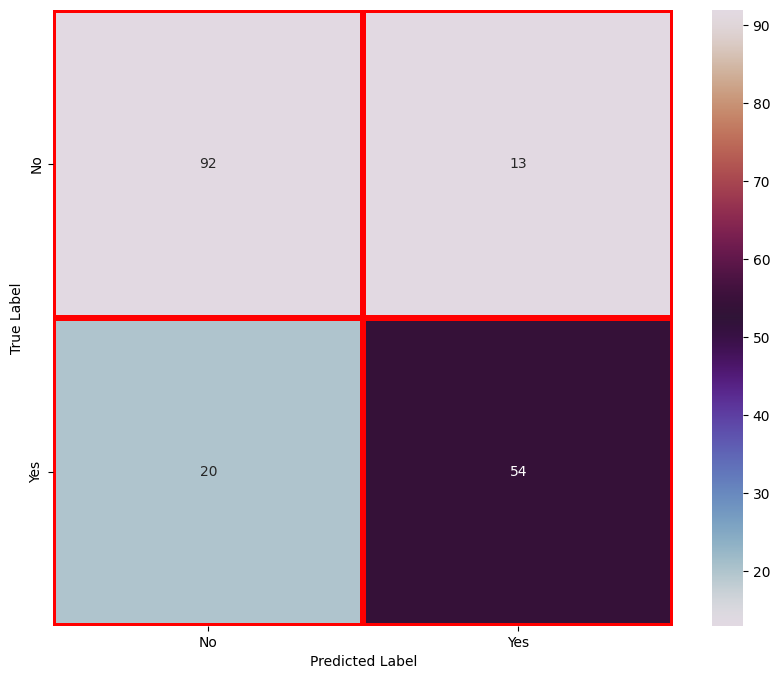

In [ ]:
plt.figure(figsize=(10, 8))
label_name = ["No", "Yes"]
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt="d", cmap="twilight", xticklabels=label_name, yticklabels=label_name, lw=4, linecolor="red")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred,target_names=label_name))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85       105
         Yes       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50, random_state=42)
ada_score= cross_val_score(ada, X,Y, cv=5)
ada.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoostClassifier(random_state=42)

In [ ]:
import pickle
with open('ada_model_1.pkl', 'wb') as f:
    pickle.dump(ada, f)

In [ ]:
pred1=ada.predict(X_test)
acc1=accuracy_score(y_test,pred1)
print("AdaBoost Accuracy:", acc1)

AdaBoost Accuracy: 0.8100558659217877


In [ ]:
print("Cross-Validation Scores for AdaBoost:",ada_score)
print("=====================================================================================")
mean_cv_score_ada_boost = ada_score.mean()
std_cv_score_ada_boost = ada_score.std()
print("=====================================================================================")

print("Mean Cross-Validation Score for AdaBoost:", mean_cv_score_ada_boost)
print("=====================================================================================")
print("Standard Deviation of Cross-Validation Scores for AdaBoost:", std_cv_score_ada_boost)
print("=====================================================================================")

Cross-Validation Scores for AdaBoost: [0.74860335 0.80337079 0.80337079 0.8258427  0.83146067]
Mean Cross-Validation Score for AdaBoost: 0.8025296591551065
Standard Deviation of Cross-Validation Scores for AdaBoost: 0.029291510524419664


In [ ]:
plt.figure(figsize=(10, 8))
label_name = ["No", "Yes"]
cf = confusion_matrix(y_test,pred1)
sns.heatmap(cf, annot=True, fmt="d", cmap="PuOr", xticklabels=label_name, yticklabels=label_name, lw=4, linecolor="green")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
print(classification_report(y_test,pred1,target_names=label_name))

              precision    recall  f1-score   support

          No       0.84      0.83      0.84       105
         Yes       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
test_data=np.array([[1,0,0.63,1,0,0.76,-2.15,1]])
prediction=ada.predict(test_data)
if prediction==0:
    print("Passenger Did Not Survived")
else:
    print("Passenger Survived")


Passenger Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
